# Validação Cruzada

-----------

#  k-fold

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import numpy as np
import lmfit

In [2]:
#caminhos para fazer os DataFrames
df_fermi = pd.read_csv ("CSVs\Dados_Fermi.csv")
df_energia = pd.read_csv("CSVs\Dados_energia.csv")

### Separando dados em treino e teste (energia de fermi)

In [3]:
# Energia de Fermi
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

DATASET_NAME = "df_fermi"
# faz uma lista de features que queremos usar, no caso são todas
FEATURES = list(df_fermi.keys())
# tira o nosso target entre as features
FEATURES.remove("Fermi_energy")
#o que queremos achar
TARGET = ["Fermi_energy"]

indices = df_fermi.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_fe = df_fermi.loc[indices_treino]
df_teste_fe = df_fermi.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_fe = df_treino_fe.reindex(FEATURES, axis=1).values
y_treino_fe = np.ravel(df_treino_fe.reindex(TARGET, axis=1).values)
x_teste_fe = df_teste_fe.reindex(FEATURES, axis=1).values
y_teste_fe = np.ravel(df_teste_fe.reindex(TARGET, axis=1).values)

### Cross Validation para floresta aleatória com 10 arvores

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

NUM_ARVORES = 10
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    x_treino_fe,
    y_treino_fe,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ", - scores)
print()
print("A média dos scores é de: ", - scores.mean())

Os scores foram de:  [0.08352257 0.08794675 0.08216868 0.08071747 0.08281219 0.08213065
 0.08156525 0.0820736  0.0790669  0.08911839]

A média dos scores é de:  0.08311224565705681


### Agora aumentando o número de arvores para 100

In [11]:
NUM_ARVORES = 100
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    x_treino_fe,
    y_treino_fe,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ",- scores)
print()
print("A média dos scores é de: ",- scores.mean())

Os scores foram de:  [0.08066141 0.08337735 0.0793137  0.07713305 0.07872059 0.07928557
 0.07749854 0.07830351 0.07778786 0.08515371]

A média dos scores é de:  0.07972352781543643


### Agora aumentando o número de arvores para 150

In [6]:
NUM_ARVORES = 150
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    x_treino_fe,
    y_treino_fe,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ",- scores)
print()
print("A média dos scores é de: ",- scores.mean())

Os scores foram de:  [0.08029373 0.08311214 0.07912048 0.07719975 0.07854994 0.07919589
 0.07722991 0.07817052 0.07766677 0.08523038]

A média dos scores é de:  0.0795769507320801


### Agora sim vamos aplicar o modelo aos dados de teste para verificar o desempenho, sendo com 100 ávores

O RMSE do modelo floresta aleatória no conjunto de teste foi de 0.07992165733552065 eV.


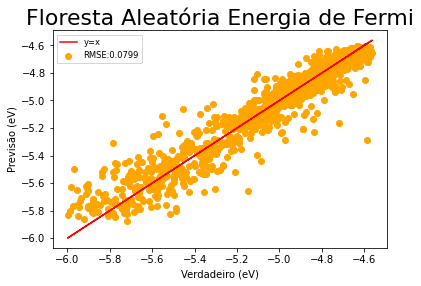

In [6]:
from sklearn.metrics import mean_squared_error

NUM_ARVORES = 100
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
modelo_rf.fit(x_treino_fe, y_treino_fe)

y_previsao_fe = modelo_rf.predict(x_teste_fe)
RMSE = mean_squared_error(y_teste_fe, y_previsao_fe, squared=False)

y_verdadeiro = y_teste_fe
y_previsao = modelo_rf.predict(x_teste_fe)
#Criar gráficos
fig, ax = plt.subplots(1,1)
ax.scatter(y_verdadeiro, y_previsao, c = 'orange',label = f'RMSE:{RMSE:.4f}')
ax.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax.legend(fontsize='small')

ax.set_title('Floresta Aleatória Energia de Fermi', fontsize = 22)

ax.set_xlabel('Verdadeiro (eV)')
ax.set_ylabel('Previsão (eV)')


print(f"O RMSE do modelo floresta aleatória no conjunto de teste foi de {RMSE} eV.")

**deu OverFit?** O modelo de teste ainda foi 0,0002 maior que a cross validation.

### Separando dados em treino e teste (energia por átomo)

In [7]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

DATASET_NAME = "df_energia"
# faz uma lista de features que queremos usar, no caso são todas
FEATURES = list(df_energia.keys())
# tira o nosso target entre as features
FEATURES.remove("energy_per_atom")
#o que queremos achar
TARGET = ["energy_per_atom"]

indices = df_energia.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_en = df_energia.loc[indices_treino]
df_teste_en = df_energia.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_en = df_treino_en.reindex(FEATURES, axis=1).values
y_treino_en = np.ravel(df_treino_en.reindex(TARGET, axis=1).values)
x_teste_en = df_teste_en.reindex(FEATURES, axis=1).values
y_teste_en = np.ravel(df_teste_en.reindex(TARGET, axis=1).values)

### Cross Validation para floresta aleatória com 10 arvores

In [8]:
NUM_ARVORES = 10
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    x_treino_en,
    y_treino_en,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ", - scores)
print()
print("A média dos scores é de: ", - scores.mean())

Os scores foram de:  [0.06521117 0.04989111 0.03095488 0.02978581 0.02914325 0.06032792
 0.04143166 0.04110675 0.03938741 0.03593437]

A média dos scores é de:  0.04231743230003028


### Agora aumentando o número de árvores para 100

In [9]:
NUM_ARVORES = 100
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    x_treino_en,
    y_treino_en,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ",- scores)
print()
print("A média dos scores é de: ",- scores.mean())

Os scores foram de:  [0.03802986 0.04220244 0.02707044 0.02709005 0.02793302 0.05360136
 0.03756991 0.04151985 0.03521157 0.03750428]

A média dos scores é de:  0.036773277435550825


### Agora aumentando o número de árvores para 150

In [10]:
NUM_ARVORES = 150
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    x_treino_en,
    y_treino_en,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ",- scores)
print()
print("A média dos scores é de: ",- scores.mean())

Os scores foram de:  [0.03715128 0.04114269 0.02700494 0.02712938 0.02859147 0.05419674
 0.0360676  0.04146878 0.03375025 0.03768659]

A média dos scores é de:  0.03641897336840906


### Agora sim vamos aplicar o modelo aos dados de teste para verificar o desempenho com 100 árvores


O RMSE do modelo floresta aleatória no conjunto de teste foi de 0.020550037336711003 eV.


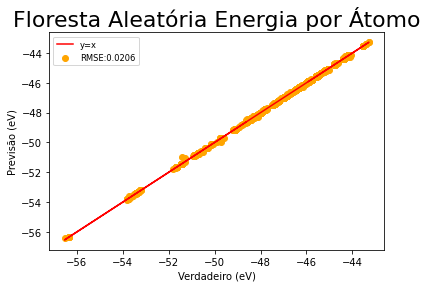

In [10]:
NUM_ARVORES = 100
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=NUM_CPU_CORES,
)
modelo_rf.fit(x_treino_en, y_treino_en)

y_previsao_en = modelo_rf.predict(x_teste_en)
RMSE = mean_squared_error(y_teste_en, y_previsao_en, squared=False)

y_verdadeiro = y_teste_en
y_previsao = modelo_rf.predict(x_teste_en)
#Criar gráficos
fig, ax = plt.subplots(1,1)
ax.scatter(y_verdadeiro, y_previsao, c = 'orange',label = f'RMSE:{RMSE:.4f}')
ax.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax.legend(fontsize='small')

ax.set_title('Floresta Aleatória Energia por Átomo', fontsize = 22)

ax.set_xlabel('Verdadeiro (eV)')
ax.set_ylabel('Previsão (eV)')


print(f"O RMSE do modelo floresta aleatória no conjunto de teste foi de {RMSE} eV.")

**Deu overfit?** NÃO, houve uma diferença de 0.01615 entre as performances, sendo que a validação cruzada ficou com menos. 

# Pipelines

### Vamos fazer um pipeline que normaliza e treina, e testar para um modelo de k-NN

### Energia de Fermi:

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

NUM_VIZINHOS = 10
NUM_FOLDS = 10

modelo_knn_composto = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

scores = cross_val_score(
    modelo_knn_composto,
    x_treino_fe,
    y_treino_fe,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ", -scores)
print()
print("A média dos scores é de: ", -scores.mean())

Os scores foram de:  [0.08279198 0.08750753 0.08178513 0.07943426 0.08265423 0.08224767
 0.08123651 0.08136519 0.08089224 0.08919629]

A média dos scores é de:  0.08291110279256561


### Vamos comparar um modelo de 10 vizinhos com um de 20 vizinhos:

In [12]:
NUM_VIZINHOS = 20
NUM_FOLDS = 10

modelo_knn_composto = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

scores = cross_val_score(
    modelo_knn_composto,
    x_treino_fe,
    y_treino_fe,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ", -scores)
print()
print("A média dos scores é de: ", -scores.mean())

Os scores foram de:  [0.08294936 0.08451272 0.08003449 0.07840578 0.08174162 0.08008714
 0.07939196 0.07885623 0.08125018 0.08665321]

A média dos scores é de:  0.08138826849661662


com 20 vizinhos ficou melhor

### E agora treinando o modelo:

O RMSE do modelo k-NN no conjunto de teste foi de 0.08200900090963235 eV.


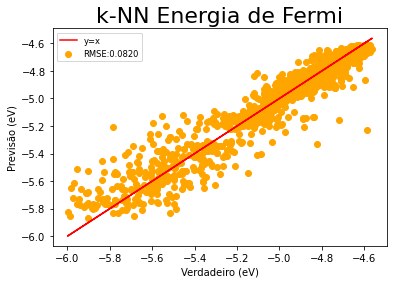

In [13]:
NUM_VIZINHOS = 20

modelo_knn_composto = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)
modelo_knn_composto.fit(x_treino_fe, y_treino_fe)

y_verdadeiro = y_teste_fe
y_previsao = modelo_knn_composto.predict(x_teste_fe)
RMSE = mean_squared_error(y_teste_fe, y_previsao, squared=False)
#Criar gráficos
fig, ax = plt.subplots(1,1)
ax.scatter(y_verdadeiro, y_previsao, c = 'orange',label = f'RMSE:{RMSE:.4f}')
ax.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax.legend(fontsize='small')

ax.set_title('k-NN Energia de Fermi', fontsize = 22)

ax.set_xlabel('Verdadeiro (eV)')
ax.set_ylabel('Previsão (eV)')


print(f"O RMSE do modelo k-NN no conjunto de teste foi de {RMSE} eV.")

### Energia total por átomo:

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

NUM_VIZINHOS = 10
NUM_FOLDS = 10

modelo_knn_composto = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

scores = cross_val_score(
    modelo_knn_composto,
    x_treino_en,
    y_treino_en,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ", -scores)
print()
print("A média dos scores é de: ", -scores.mean())

Os scores foram de:  [0.07052708 0.05162752 0.0562143  0.05169767 0.06622688 0.05407783
 0.05837459 0.06291007 0.08438067 0.05476482]

A média dos scores é de:  0.06108014360795747


### Vamos comparar um modelo de 10 vizinhos com um de 20 vizinhos:

In [15]:
NUM_VIZINHOS = 20
NUM_FOLDS = 10

modelo_knn_composto = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

scores = cross_val_score(
    modelo_knn_composto,
    x_treino_en,
    y_treino_en,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("Os scores foram de: ", -scores)
print()
print("A média dos scores é de: ", -scores.mean())

Os scores foram de:  [0.08935409 0.06576329 0.06450601 0.06269914 0.088142   0.06533301
 0.07298089 0.07444457 0.08532271 0.07034787]

A média dos scores é de:  0.07388935677813532


com 10 vizinhos ficou melhor

### E agora treinando o modelo:

O RMSE do modelo k-NN no conjunto de teste foi de 0.05312847648212496 eV.


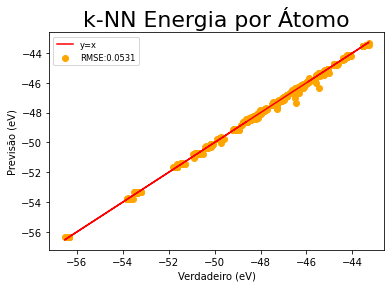

In [16]:
NUM_VIZINHOS = 10

modelo_knn_composto = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)
modelo_knn_composto.fit(x_treino_en, y_treino_en)

y_verdadeiro = y_teste_en
y_previsao = modelo_knn_composto.predict(x_teste_en)
RMSE = mean_squared_error(y_teste_en, y_previsao, squared=False)
#Criar gráficos
fig, ax = plt.subplots(1,1)
ax.scatter(y_verdadeiro, y_previsao, c = 'orange',label = f'RMSE:{RMSE:.4f}')
ax.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax.legend(fontsize='small')

ax.set_title('k-NN Energia por Átomo', fontsize = 22)

ax.set_xlabel('Verdadeiro (eV)')
ax.set_ylabel('Previsão (eV)')


print(f"O RMSE do modelo k-NN no conjunto de teste foi de {RMSE} eV.")

## Discussão

Despois da Validação Cruzada, o RMSE continuou bem pequeno, na segunda casa decimal de diferença para os targets diferentes, sendo que para a energia por átomo e para energia de fermi a floresta aleatória e a árvore de decisções foram os melhores modelos, de forma que a energia por átomo ficou melhor, como podemos ver nos gráficos que já foram plotados anteriormente